<div style="text-align: center; color:aquamarine">
  <h2>Concrete Strength Prediction</h2>
</div>

**Objective:** The objective of this notebook is to explore and practice key machine learning
packages such as pandas, scikit-learn, and matplotlib. It aims to enhance the ability to
analyze correlations between features, evaluate performance metrics, and introduce
various regression algorithms and their applications.

**Description:** In this notebook, we are provided with a concrete compressive
strength dataset containing eight features and one target variable(continuous). This is a
regression problem, where the objective is to predict the “strength” of concrete based on
several related features.

**Datasets Link:** https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
To work on this problem, we need to follow the steps and produce these outputs. Moreover, we
need to explain the correlation matrix and performance metrics.

<div style="text-align: center; color:aquamarine">
  <h2>Importing the Libraries</h2>
</div>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import numpy as np

<div style="text-align: center; color:aquamarine">
  <h2>Loading Dataset</h2>
</div>

In [11]:
# Loading the dataset from an Excel file
file_path = 'Concrete_Data.xls'
df = pd.read_excel(file_path)

# Displaying the first few rows of the dataframe
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


<div style="text-align: center; color:aquamarine">
  <h2>Exploratory Data Analysis</h2>
</div>

In [17]:
# Renaming the last column to 'strength'
df.rename(columns={df.columns[8]: 'strength'}, inplace=True)
# Displaying the first few rows of the dataframe to confirm the change
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


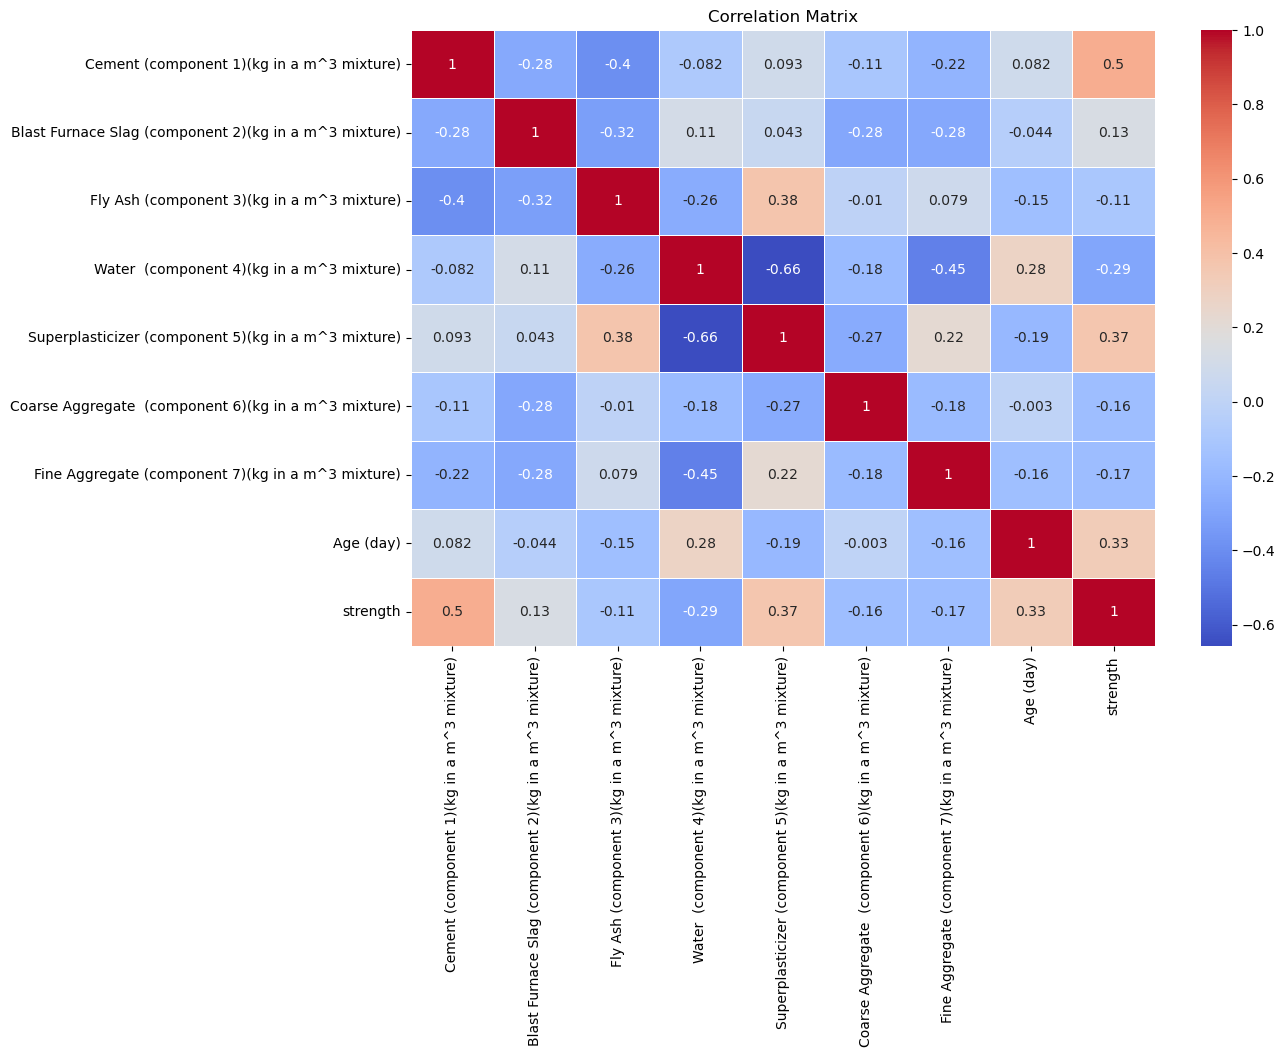

In [19]:
# Generating the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Explanation

This is a correlation matrix that shows the relationship between different components of the concrete mixture and the strength of the concrete. The matrix is color-coded to represent the strength of the correlation, with red shades indicating positive correlations and blue shades indicating negative correlations.

### Variables:
The rows and columns represent different components of the concrete mixture (Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate), the Age of the concrete (in days), and the Strength of the concrete.

### Correlation Values:
- The color intensity corresponds to the strength of the correlation, with red shades representing positive correlations and blue shades representing negative correlations. The scale on the right indicates the values range from **-1** (perfect negative correlation) to **1** (perfect positive correlation).
- A value of **1** or close to **1** indicates a strong positive correlation between two variables, meaning as one increases, so does the other.
- A value of **-1** or close to **-1** indicates a strong negative correlation, meaning as one variable increases, the other decreases.
- A value around **0** indicates no correlation.

### Key observations from the matrix:
- **Cement and Strength**: There is a moderate positive correlation (**0.5**), suggesting that increasing the amount of cement in the mixture tends to improve the strength of the concrete.
- **Blast Furnace Slag and Strength**: This has a weaker positive correlation (**0.13**), meaning that this component has a less significant effect on concrete strength.
- **Fly Ash and Strength**: The correlation is negative (**-0.11**), suggesting that increasing Fly Ash might slightly reduce the strength of the concrete.
- **Water and Strength**: There is a moderately negative correlation (**-0.29**), indicating that more water in the mixture reduces the strength of the concrete, which is consistent with general concrete mixing principles.
- **Superplasticizer and Strength**: The correlation is positive (**0.37**), meaning that increasing Superplasticizer tends to improve the strength of the concrete.
- **Age and Strength**: There is a positive correlation (**0.33**), indicating that as the concrete ages, its strength increases, which aligns with the natural curing process of concrete.
- **Coarse Aggregate, Fine Aggregate, and Strength**: Both have weak negative correlations (**-0.16** and **-0.17**), suggesting that these aggregates have a small inverse impact on the concrete’s strength.

### Overall Interpretation:
The matrix shows how different components in the concrete mixture influence the strength of the material. Cement and Superplasticizer have the most positive impact, while Water and Fly Ash tend to have a negative effect. Age also contributes positively to the strength over time.

<div style="text-align: center; color:aquamarine">
  <h2>Splitting the Dataset</h2>
</div>

In [20]:
# Separating the features and target variable
X = df.drop(columns=['strength'])
y = df['strength']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (824, 8)
X_test shape: (206, 8)
y_train shape: (824,)
y_test shape: (206,)


In [22]:
# Standardizing/Scaling the features
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying scaling to the features

# Converting the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

df_scaled = pd.concat([X_scaled_df, y], axis=1)

# Print the first five rows of the scaled features
df_scaled.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,-1.160846,0.857395,0.982474,-0.314231,1.481991,-0.257457,-0.647505,-0.275673,79.986111
1,1.308634,-0.602489,1.232625,-0.178148,0.388662,-1.926947,-0.273130,-0.275673,61.887366
2,-0.077122,-0.855581,1.066118,-1.047204,0.626779,1.017866,0.066649,-0.689313,40.269535
3,-0.291783,0.260327,0.357096,0.572657,0.308171,-1.761651,0.604117,-0.275673,41.052780
4,-1.065193,-0.369874,1.111458,-1.101168,0.782730,1.363716,0.297081,-0.689313,44.296075


<div style="text-align: center; color:aquamarine">
  <h2>Training & Testing Models</h2>
</div>

### 1. Linear Regressor

In [28]:
# Initializing the Linear Regression model
model_lr = LinearRegression()

# Training the model on the scaled training data
model_lr.fit(X_train_scaled, y_train)

# Predicting the target variable for the test data
y_pred_lr = model_lr.predict(X_test_scaled)

# Displaying the first few predictions
y_pred_lr[:5]

array([59.65716303, 52.03714377, 63.51983933, 51.57136586, 17.22016023])

### 2. Decision Tree Regressor

In [24]:
# Initializing the Decision Tree Regressor model
model_dt = DecisionTreeRegressor()

# Training the model on the scaled training data
model_dt.fit(X_train_scaled, y_train)

# Predicting the target variable for the test data
y_pred_dt = model_dt.predict(X_test_scaled)

# Displaying the first few predictions
y_pred_dt[:5]

array([51.73276323, 39.39665864, 71.29871316, 35.3011712 , 10.53588276])

### 3. Support Vector Machine (SVM)

In [25]:
# Initializing the Support Vector Machine Regressor model
model_svr = SVR()

# Training the model on the scaled training data
model_svr.fit(X_train_scaled, y_train)

# Predicting the target variable for the test data
y_pred_svr = model_svr.predict(X_test_scaled)

# Displaying the first few predictions
y_pred_svr[:5]

array([42.03139548, 53.0686222 , 55.41209704, 52.24747062, 27.15705267])

<div style="text-align: center; color: aquamarine">
  <h2>Model Evaluation</h2>
</div>


In [33]:
# Mean Squared Error (MSE) and R^2 score for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R²: {r2_lr}")

# Mean Squared Error (MSE) and R^2 score for the Decision Tree Regressor model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor MSE: {mse_dt}")
print(f"Decision Tree R²: {r2_dt}")

# Mean Squared Error (MSE) and R^2 score for the Support Vector Machine Regressor model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVM MSE: {mse_svr}")
print(f"SVM R²: {r2_svr}")


Linear Regression MSE: 95.97548435337708
Linear Regression R²: 0.627541605542902
Decision Tree Regressor MSE: 49.83763469406927
Decision Tree R²: 0.8065918028259552
SVM MSE: 88.97832686422466
SVM R²: 0.6546959362736274


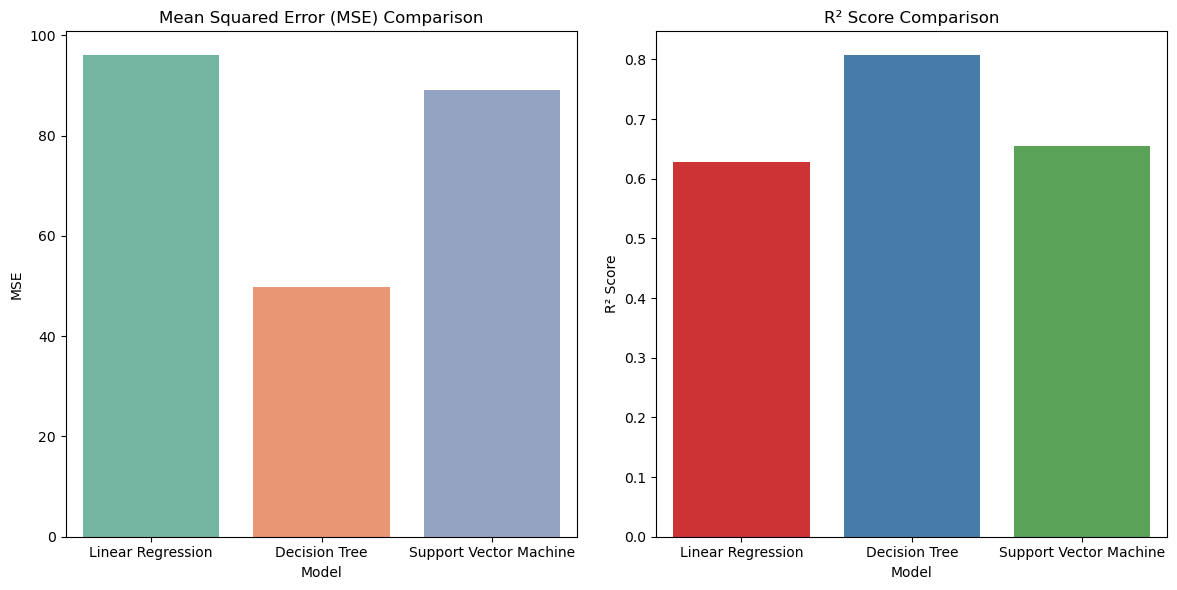

In [60]:
# Creating a DataFrame to hold the performance metrics
performance_metrics = pd.DataFrame({
  'Model': ['Linear Regression', 'Decision Tree', 'Support Vector Machine'],
  'MSE': [mse_lr, mse_dt, mse_svr],
  'R²': [r2_lr, r2_dt, r2_svr]
})

# Plotting the MSE values
plt.figure(figsize=(12, 6))

# MSE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=performance_metrics, hue='Model', palette='Set2')
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xlabel('Model')

# R² Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R²', data=performance_metrics, hue='Model', palette='Set1')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

<div style="text-align: center; color:aquamarine">
  <h2>Discussion</h2>
</div>

### Explanation of Results

In this part, we evaluate the performance of three different regression models: Linear Regression, Decision Tree Regressor, and Support Vector Machine (SVM) Regressor. The performance metrics used for evaluation are Mean Squared Error (MSE) and R² score.

#### Mean Squared Error (MSE)
MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data. The MSE values for the models are as follows:
- **Linear Regression**: 95.98
- **Decision Tree Regressor**: 49.84
- **Support Vector Machine**: 88.98

From these values, we observe that the Decision Tree Regressor has the lowest MSE, indicating that it has the best fit among the three models.

#### R² Score
The R² score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score closer to 1 indicates a better fit. The R² scores for the models are as follows:
- **Linear Regression**: 0.63
- **Decision Tree Regressor**: 0.81
- **Support Vector Machine**: 0.65

The Decision Tree Regressor also has the highest R² score, suggesting that it explains the most variance in the target variable compared to the other models.

### Conclusion
Based on the MSE and R² scores, the Decision Tree Regressor outperforms both the Linear Regression and Support Vector Machine models in predicting the strength of concrete. It has the lowest MSE and the highest R² score, making it the most accurate model for this dataset.

<div style="text-align: center; color:aquamarine">
  <h2>Further Comparison</h2>
</div>

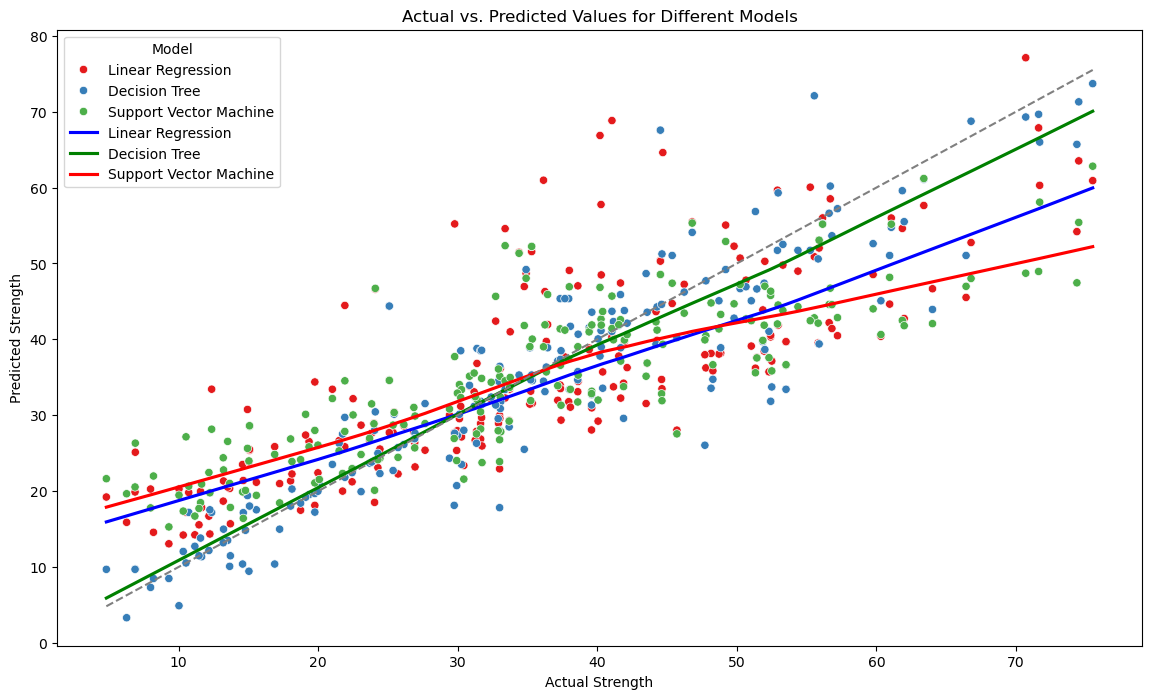

In [81]:
# Creating a DataFrame to hold the actual and predicted values
comparison_df = pd.DataFrame({
  'Actual': y_test,
  'Linear Regression': y_pred_lr,
  'Decision Tree': y_pred_dt,
  'Support Vector Machine': y_pred_svr
})

# Melting the DataFrame for easier plotting with seaborn
comparison_df_melted = comparison_df.melt(id_vars=['Actual'], var_name='Model', value_name='Predicted')

# Plotting the actual vs. predicted values for each model
plt.figure(figsize=(14, 8))
sns.scatterplot(data=comparison_df_melted, x='Actual', y='Predicted', hue='Model', palette='Set1')

# Adding best fit lines for each model

sns.regplot(x=y_test, y=y_pred_lr, color='blue', label='Linear Regression', lowess=True, scatter=False)
sns.regplot(x=y_test, y=y_pred_dt, color='green', label='Decision Tree', lowess=True, scatter=False)
sns.regplot(x=y_test, y=y_pred_svr, color='red', label='Support Vector Machine', lowess=True, scatter=False)

sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='gray', linestyle='--')

plt.title('Actual vs. Predicted Values for Different Models')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.legend(title='Model')
plt.show()

### Explanation of the Plot

The scatter plot above compares the actual concrete strength values with the predicted values from three different regression models: Linear Regression, Decision Tree Regressor, and Support Vector Machine (SVM) Regressor. Each point on the plot represents a test sample, with the x-axis showing the actual strength and the y-axis showing the predicted strength.

#### Key Observations:
- **Linear Regression**: The blue points and line represent the predictions from the Linear Regression model. The spread of points around the line indicates the accuracy of the model.
- **Decision Tree Regressor**: The green points and line represent the predictions from the Decision Tree Regressor model. This model shows a closer fit to the actual values, as indicated by the tighter clustering of points around the line.
- **Support Vector Machine (SVM)**: The red points and line represent the predictions from the SVM model. The spread of points indicates the model's performance.

#### Best Fit Line:
The gray dashed line represents the ideal scenario where the predicted values perfectly match the actual values. The closer the points are to this line, the better the model's performance.

Overall, this plot provides a visual comparison of the performance of the three models in predicting concrete strength.